In [9]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import utils as utl
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution

In [4]:
list_securities = ['SSO','UBT', 'UST', 'UGL']
window = 30 #days

#main
data = hep.create_dataframe(list_securities)
#print(data)
data_perc = hep.perc_df(data)
inv_volat_data = hep.df_inverse_volatility(data_perc, window)
data_wheighted = hep.df_wheighted(inv_volat_data)
data_earnings = hep.df_earnings(data_wheighted, data_perc)
data_earn_eq_weight = hep.df_earnings_equal_weight(data_perc)
data_earnings.dropna(inplace = True)
data_earn_eq_weight.dropna(inplace = True)
#print(data_earn_eq_weight)

In [6]:
#param
figsize=(10, 5)
fontname='Arial'
annot_size=10
square=False
cbar = False
cmap = LinearSegmentedColormap.from_list('RedGreen', ['crimson', 'gold', 'lime'])
eoy=False
compounded=True

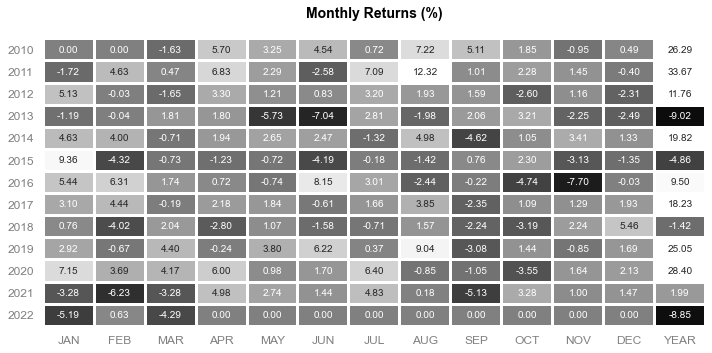

In [75]:
#crate the returns table plus the return over the year

fig, ax = plt.subplots(figsize=figsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_facecolor('white')
ax.set_facecolor('white')

ax.set_title('Monthly Returns (%)\n', fontsize=14, y=.995,
             fontname=fontname, fontweight='bold', color='black')

returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100
returns['YEAR'] =returns.sum(axis=1)

ax = sns.heatmap(returns, ax=ax, annot=True, center=0,
                annot_kws={"size": annot_size}, vmax = 10,
                fmt="0.2f", linewidths=2,
                square=square, cbar=cbar, cmap = 'gray',
                cbar_kws={'format': '%.0f%%'})

ax.tick_params(colors="#808080")
plt.xticks(rotation=0, fontsize=annot_size*1.2)
plt.yticks(rotation=0, fontsize=annot_size*1.2)
plt.subplots_adjust(hspace=0, bottom=0, top=1)
fig.tight_layout(w_pad=0, h_pad=0)
plt.savefig('./img/table_montly_returns.png')

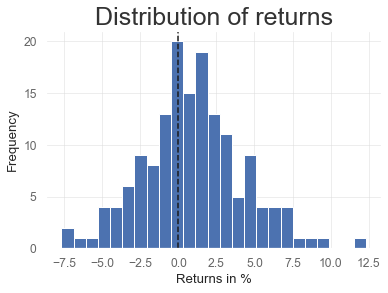

In [77]:
returns = monthly_returns(data_earnings['Tot'], eoy=eoy,compounded=compounded) * 100

series = pd.Series(dtype = 'float64')
for column in returns.columns:
    series = pd.concat([series,returns[column]])
#distribution(returns)
ax = series.plot.hist(bins = 25)
#ax.set_title("my title")
ax.set_title('Distribution of returns', size = 25)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel("Returns in %")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.savefig('./img/distribution_returns.png')

In [10]:
statistics = pd.DataFrame(columns = ['index', 'value'])

statistics.loc[0] = ['Sharpe ratio', sharpe(data_earnings['Tot'])]
statistics.loc[1] = ['Sortino ratio', sortino(data_earnings['Tot'])]
statistics.loc[2] = ['Adjusted sortino', adjusted_sortino(data_earnings['Tot'])] 
statistics.loc[3] = ['Skew', skew(data_earnings['Tot'])] 
statistics.loc[4] = ['Kurtosis', data_earnings['Tot'].kurt()] 
statistics.loc[5] = ['Max drawdown', max_drawdown(data_earnings['Tot'])] 
statistics.loc[6] = ['GPR', gain_to_pain_ratio(data_earnings['Tot'])] 
statistics.loc[7] = ['Calmar ratio', calmar(data_earnings['Tot'])] 
statistics.loc[8] = ['Pay-off ratio', payoff_ratio(data_earnings['Tot'])] 

statistics

,index,value
0,Sharpe ratio,1.062149
1,Sortino ratio,1.522468
2,Adjusted sortino,1.076547
3,Skew,-0.299980
4,Kurtosis,3.009638
5,Max drawdown,-0.167938
6,GPR,0.198236
7,Calmar ratio,0.750378
8,Pay-off ratio,0.977887


In [82]:
htmlfile = open('all_weather_report.html','w')

htmlfile.write('<img src = "' + './img/distribution_returns.png' + '" alt ="cfg">\n')


htmlfile.close()

In [7]:
from quantstats._plotting.wrappers import drawdowns_periods, drawdown

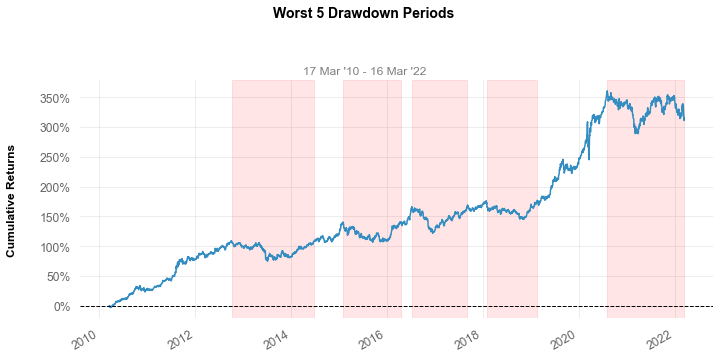

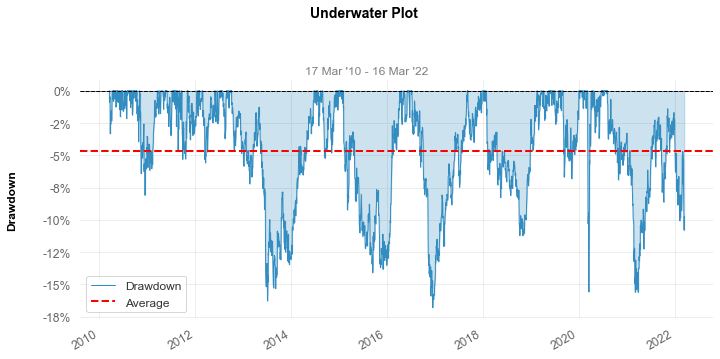

In [8]:
drawdowns_periods(data_earnings['Tot'])
drawdown(data_earnings['Tot'])